# Magic the Gathering analysis

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import sys

%matplotlib inline

## Number of cards illustrated per artist
Here two plots displaying the number of cards illustrated by each artist.

We can see that the most productive artist is Kev Walker, with __454__ cards illustrated since __1996__, for an average of approximately __16__ cards a year for the past __27__ year. He is also well ahead of the Svetlin Velinov with practically half as more cards illustrated.

artist
Dan Scott          296
Greg Staples       309
Daarken            310
Svetlin Velinov    333
Kev Walker         454 

artist
Justin Hernandez & Alexis Hernandez     18
Jana Schirmer & Johannes Voss           24
Larissa Hasenheit & Mina Jeon           48
Greg Hildebrandt & Tim Hildebrandt      65
Zoltan Boros & Gabor Szikszai          127 



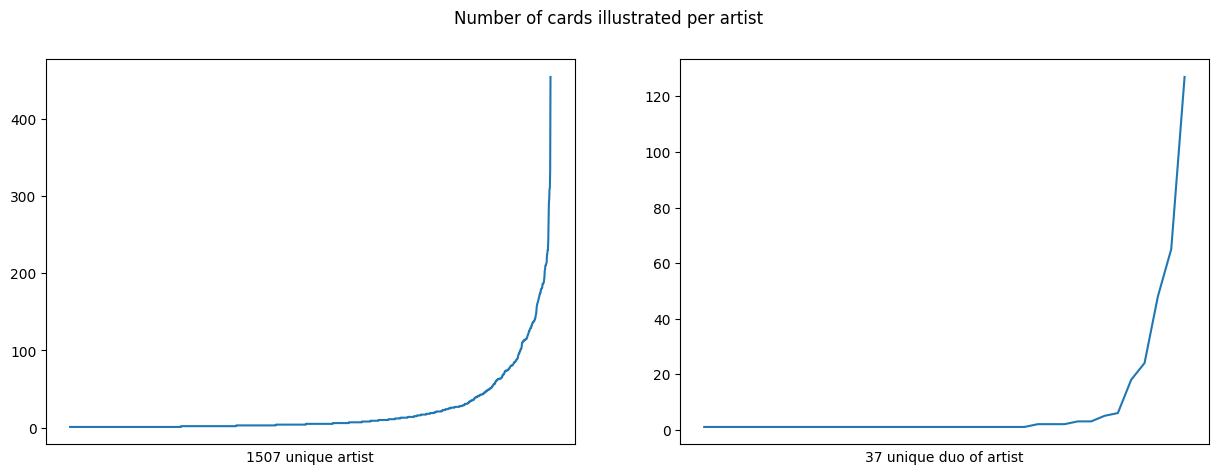

In [87]:
df = pd.read_csv("./cards.csv", usecols=["artist", "name"]).dropna()

# separate solo and duo, by applying a mask
df["mask"] = df["artist"].str.contains("&")  # & present if duo
df = df[["artist", "name", "mask"]].drop_duplicates()
df_solo = df[~df["mask"]].value_counts("artist", ascending=True)
df_duo = df[df["mask"]].value_counts("artist", ascending=True)

print(df_solo.tail().to_string(), "\n")
print(df_duo.tail().to_string(), "\n")

fig, axes = plt.subplots(ncols=2)
fig.suptitle("Number of cards illustrated per artist")

solo_plot = df_solo.plot(kind="line", ax=axes[0])
solo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
solo_plot.set_xlabel(f"{df_solo.shape[0]} unique artist")
solo_plot.set_title("")

duo_plot = df_duo.plot(kind="line", ax=axes[1])
duo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
duo_plot.set_xlabel(f"{df_duo.shape[0]} unique duo of artist")
duo_plot.set_title("")

plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

## Cards per mana cost
Here a plot displaying the repartition of cards by their mana cost.

We can see two anomalies, both are joke cards not legal in most format:
- 0,5 -> Little girl
- 1.000.000 -> Gleemax

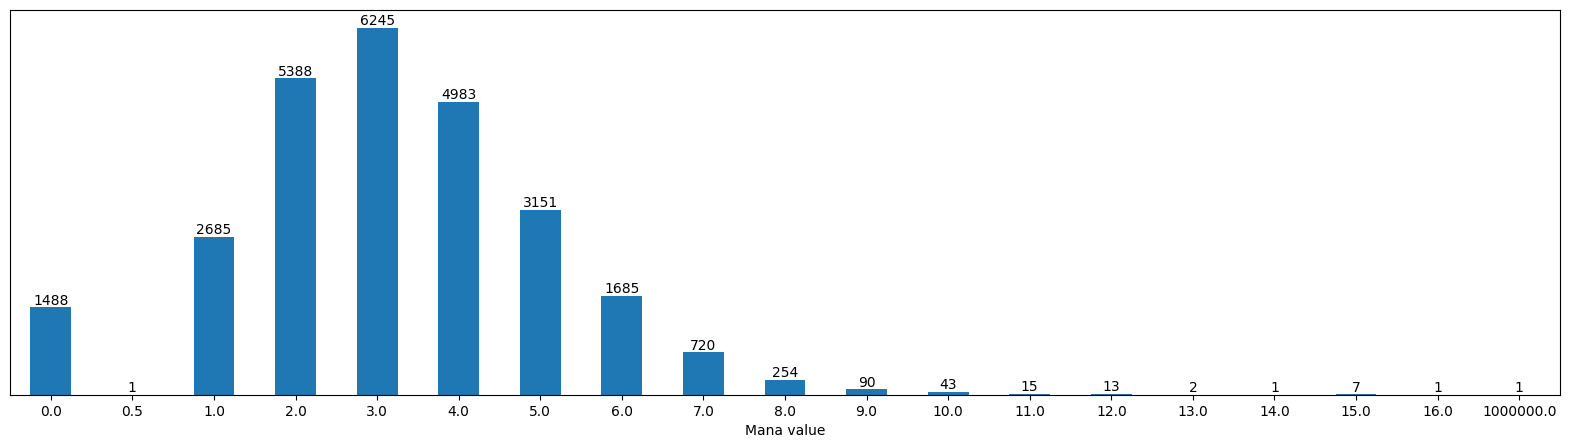

In [89]:
df = pd.read_csv("./cards.csv", usecols=["name", "manaValue"])
df = df.drop_duplicates().value_counts("manaValue").sort_index()

plot = df.plot(kind="bar", rot=0)
plot.bar_label(plot.containers[0])
plot.tick_params("y", which="both", left=False, labelleft=False)
plot.set_xlabel("Mana value")
plot.set_title("")

plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

## The 10 most reprinted cards
Here a plot of the most reprinted cards in Magic the Gathering history. 

I preferred to exclude the lands, because they would obviously be at the top. 

The slightest alteration in design is enough to make it a disctint reprint.

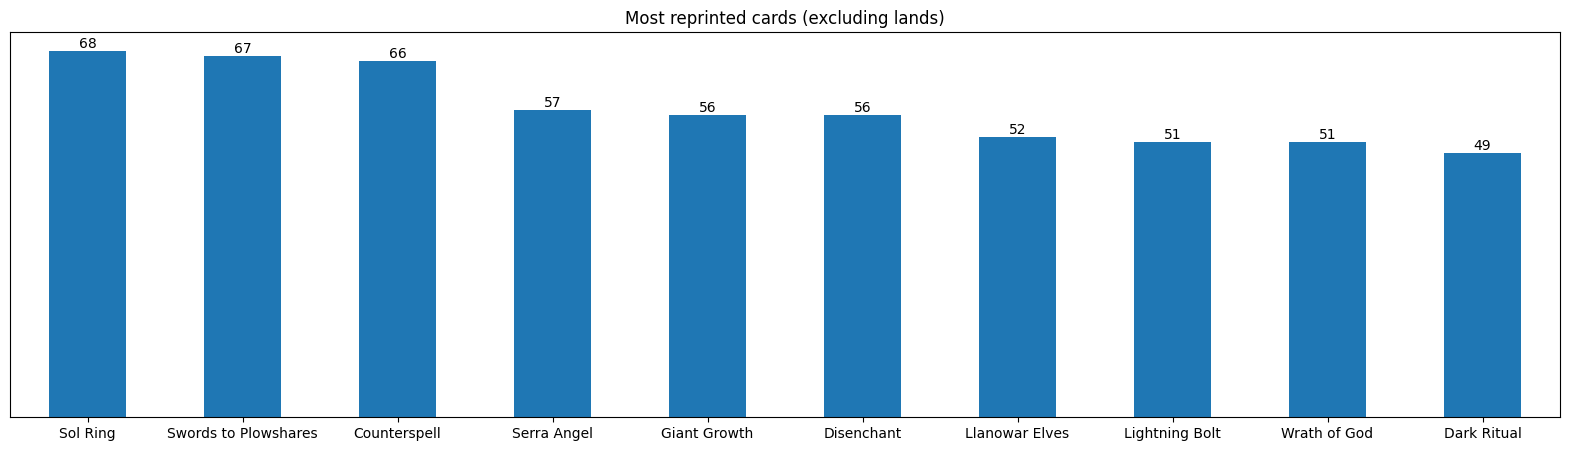

In [74]:
df = pd.read_csv("./cards.csv", usecols=["name", "types"])
df = df.loc[(df["types"] != "Land")]  # exclude the lands
df = df["name"].value_counts()[:10]  # select the top ten

plot = df.plot(kind="bar", rot=0)
plot.bar_label(plot.containers[0])
plot.tick_params("y", which="both", left=False, labelleft=False)
plot.set_title("Most reprinted cards (excluding lands)")
plot.set_xlabel("")

plt.rcParams['figure.figsize'] = [20, 5]
plt.show()